In [12]:
%pylab inline
import sys, numpy as np, scipy as sp, matplotlib.pyplot as plt

sys.path.append('../engine')
sys.path.append('..')

from engine import analog_new as analog

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sample_rate = 20000
nyquist = sample_rate/2
Wp = [300/nyquist, 4000/nyquist]
Ws = [100/nyquist, 6000/nyquist]
Gp = 3
Gs = 80
rp = 3

freq_range = 2*pi * np.linspace(1, 8000, 1000)
filter_settings = {'passband_frequency': Wp,
                   'stopband_frequency': Ws,
                   'passband_attenuation': Gp,
                   'stopband_attenuation': Gs}
    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
# Design the filters
butter_N, butter_Wn = sp.signal.buttord(Wp, Ws, Gp, Gs, analog=False)
cheby1_N, cheby1_Wn = sp.signal.cheb1ord(Wp, Ws, Gp, Gs, analog=False)
cheby2_N, cheby2_Wn = sp.signal.cheb2ord(Wp, Ws, Gp, Gs, analog=False)
elliptic_N, elliptic_Wn = sp.signal.ellipord(Wp, Ws, Gp, Gs, analog=False)

butter_B, butter_A = sp.signal.butter(butter_N, butter_Wn, btype='bandpass', analog=False, output='ba')
cheby1_B, cheby1_A = sp.signal.cheby1(cheby1_N, rp, cheby1_Wn, btype='bandpass', analog=False, output='ba')
cheby2_B, cheby2_A = sp.signal.cheby2(cheby2_N, Gs, cheby2_Wn, btype='bandpass', analog=False, output='ba')
elliptic_B, elliptic_A = sp.signal.ellip(elliptic_N, rp, Gs, elliptic_Wn, btype='bandpass', analog=False, output='ba')
bessel_B, bessel_A = sp.signal.bessel(min(butter_N,25), butter_Wn, btype='bandpass', analog=False, output='ba')

butter_W, butter_H = sp.signal.freqz(butter_B, butter_A)
cheby1_W, cheby1_H = sp.signal.freqz(cheby1_B, cheby1_A)
cheby2_W, cheby2_H = sp.signal.freqz(cheby2_B, cheby2_A)
elliptic_W, elliptic_H = sp.signal.freqz(elliptic_B, elliptic_A)
bessel_W, bessel_H = sp.signal.freqz(bessel_B, bessel_A)


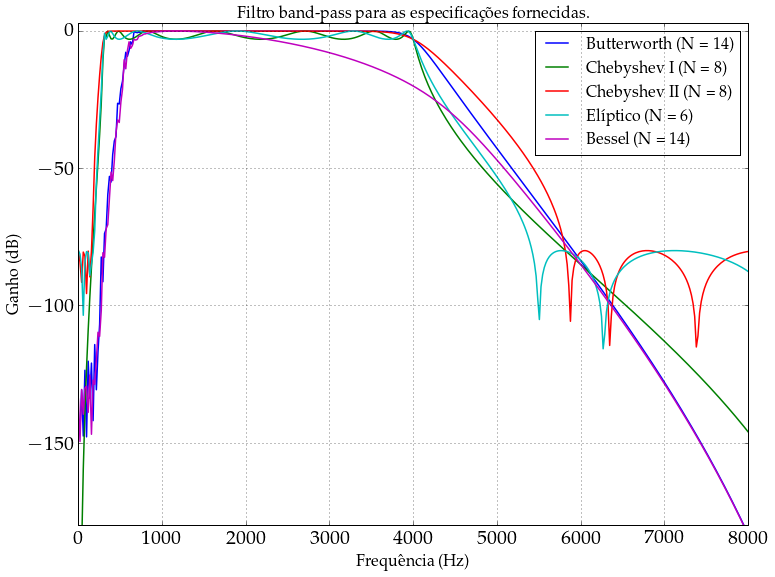

In [15]:
fig = plt.figure(1, figsize=(12, 9))

for (W, H) in [(butter_W, butter_H), (cheby1_W, cheby1_H), 
               (cheby2_W, cheby2_H), (elliptic_W, elliptic_H), 
               (bessel_W, bessel_H)]:
    
    freqs = sample_rate * W / (2*np.pi)
    plt.plot(freqs, 20 * np.log10(abs(H)), linewidth=1.5) 

    
plt.legend(["Butterworth (N = {})".format(butter_N), "Chebyshev I (N = {})".format(cheby1_N), 
            "Chebyshev II (N = {})".format(cheby2_N), "El\\'iptico (N = {})".format(elliptic_N), 
            "Bessel (N = {})".format(butter_N)], fontsize=16)
plt.xlabel("Frequ\^encia (Hz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.title("Filtro band-pass para as especifica\c{c}\~oes fornecidas.", fontsize=16)
plt.grid()
plt.axis([0, 8000, -180, 3])
plt.savefig('bandpass_IIR.eps')